<a href="https://colab.research.google.com/github/projet-ML/COVID/blob/master/statistiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Reading and processing data 

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



In [39]:
data = pd.read_csv(r'https://raw.githubusercontent.com/projet-ML/COVID/master/totalconfirmed_covid19_100620.csv')
print(len(data))
data.head()

101


,Date,Confirmed,Deaths,Recovered,Excluded,Beni Mellal-Khenifra,Casablanca-Settat,Draa-Tafilalet,Dakhla-Oued Ed-Dahab,Fes-Meknes,Guelmim-Oued Noun,Laayoune-Sakia El Hamra,Marrakesh-Safi,Oriental,Rabat-Sale-Kenitra,Souss-Massa,Tanger-Tetouan-Al Hoceima
0,2/3/2020,1,0,0,28.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/3/2020,0,0,0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4/3/2020,2,0,0,34.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/3/2020,0,0,0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/3/2020,0,0,0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
print(len(range(1, len(data)+1)))

101


Représentation de l'évolution de l'épidémie au Maroc depuis le 2/3/2020


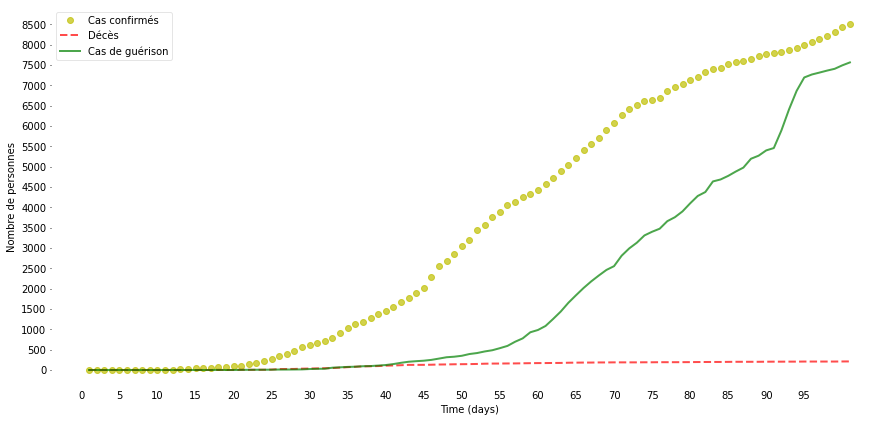

In [41]:
# representation de l'évolution de l'épidémie au Maroc
t = range(1, len(data)+1)
f, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(t, data['Confirmed'], 'yo', alpha=0.7, linewidth=2, label='Cas confirmés')
ax.plot(t, data['Deaths'], 'r--', alpha=0.7, linewidth=2, label='Décès')
ax.plot(t, data['Recovered'], 'g-', alpha=0.7, linewidth=2, label='Cas de guérison')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nombre de personnes')
ax.yaxis.set_tick_params(length=1)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
print("Représentation de l'évolution de l'épidémie au Maroc depuis le 2/3/2020")
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 9000, 500))
plt.show();

In [42]:
data = pd.read_csv(r'https://raw.githubusercontent.com/projet-ML/COVID/master/daily-covid-cases-deaths.csv')
print(len(data))
data.head()

26100


,Entity,Code,Date,Cases,Deaths
0,Afghanistan,AFG,31-Dec-19,0,0
1,Afghanistan,AFG,1-Jan-20,0,0
2,Afghanistan,AFG,2-Jan-20,0,0
3,Afghanistan,AFG,3-Jan-20,0,0
4,Afghanistan,AFG,4-Jan-20,0,0


In [43]:
data_morocco = data.query('Entity=="Morocco" and Cases > 0 ').copy()
data_morocco.head()


,Entity,Code,Date,Cases,Deaths
16018,Morocco,MAR,3-Mar-20,1,0
16019,Morocco,MAR,6-Mar-20,1,0
16020,Morocco,MAR,12-Mar-20,3,1
16021,Morocco,MAR,13-Mar-20,1,0
16022,Morocco,MAR,14-Mar-20,1,0


Représentation du nombre de cas confirmés et de décès journaliers


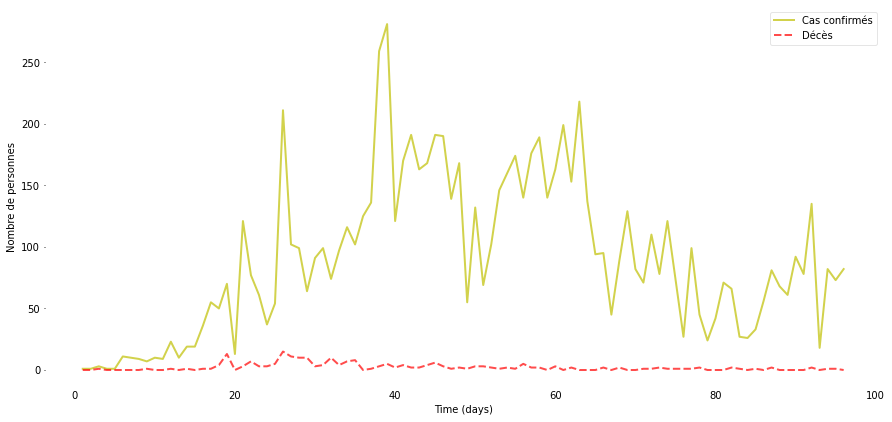

In [44]:
cases = data_morocco['Cases']
deaths = data_morocco['Deaths']
dates = data_morocco['Date']
# representation de l'évolution de l'épidémie au Maroc
t = range(1, len(data_morocco)+1)
f, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(t, cases, 'y-', alpha=0.7, linewidth=2, label='Cas confirmés')
ax.plot(t, deaths, 'r--', alpha=0.7, linewidth=2, label='Décès')
"""ax.plot(t, data['Recovered'], 'g-', alpha=0.7, linewidth=2, label='Cas de guérison')"""
ax.set_xlabel('Time (days)')
ax.set_ylabel('Nombre de personnes')
ax.yaxis.set_tick_params(length=1)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
  ax.spines[spine].set_visible(False)
print("Représentation du nombre de cas confirmés et de décès journaliers")
plt.show();

<BarContainer object of 96 artists>

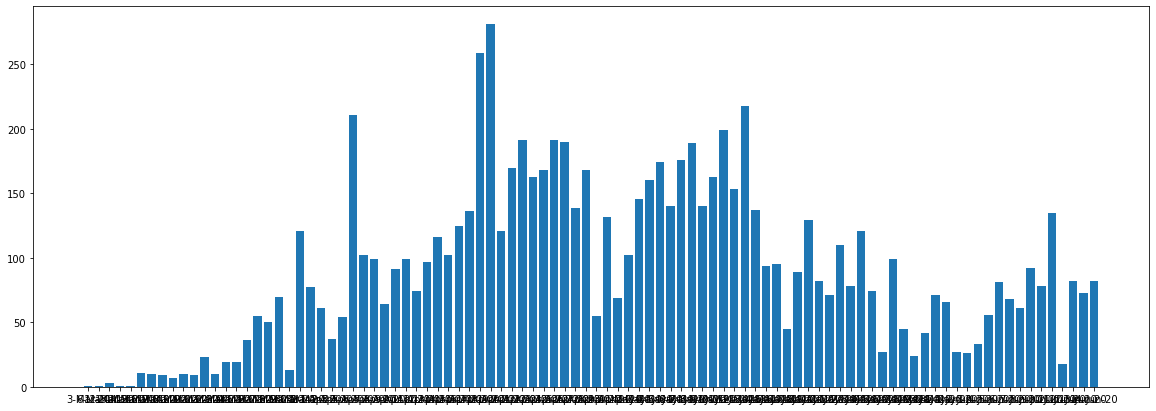

In [48]:
plt.figure(figsize=(20, 7))


plt.bar(dates, cases)
